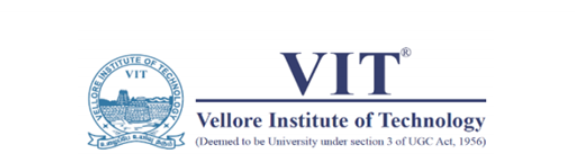
SCHOOL OF COMPUTER SCIENCE ENGINEERING
FALL SEMESTER 2021-2022
                                     
NAME: Valliammai.V <br>
REG NO: 19MID0124 <br>
COURSE CODE: MDI4001 <br>
FACULTY: Dr.ABDUL GAFFAR H<br>  
SUBJECT: Machine Learning for Data Science (ELA)<br> 
LAB FAT:

#### Question:
  ##### Implement Multilayer perceptron and analyse the classification result for  bank additional full.csv dataset..  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import seaborn as sns

In [2]:
#reading the bank additional full.csv 
df = pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
#Viewing the first 5 rows of data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#viewing the  last 5 rows of data
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
#shape of the data
df.shape

(41188, 21)

In [6]:
#displaying info of dtype of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [8]:
#describtion of all numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#describtion of all columns
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


<AxesSubplot:xlabel='y', ylabel='count'>

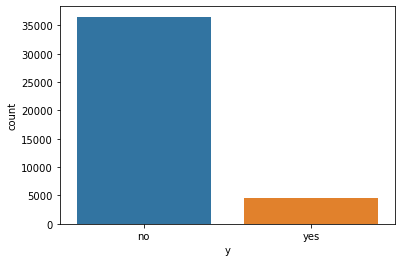

In [10]:
#count plot for target columns
sns.countplot(x =df['y'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

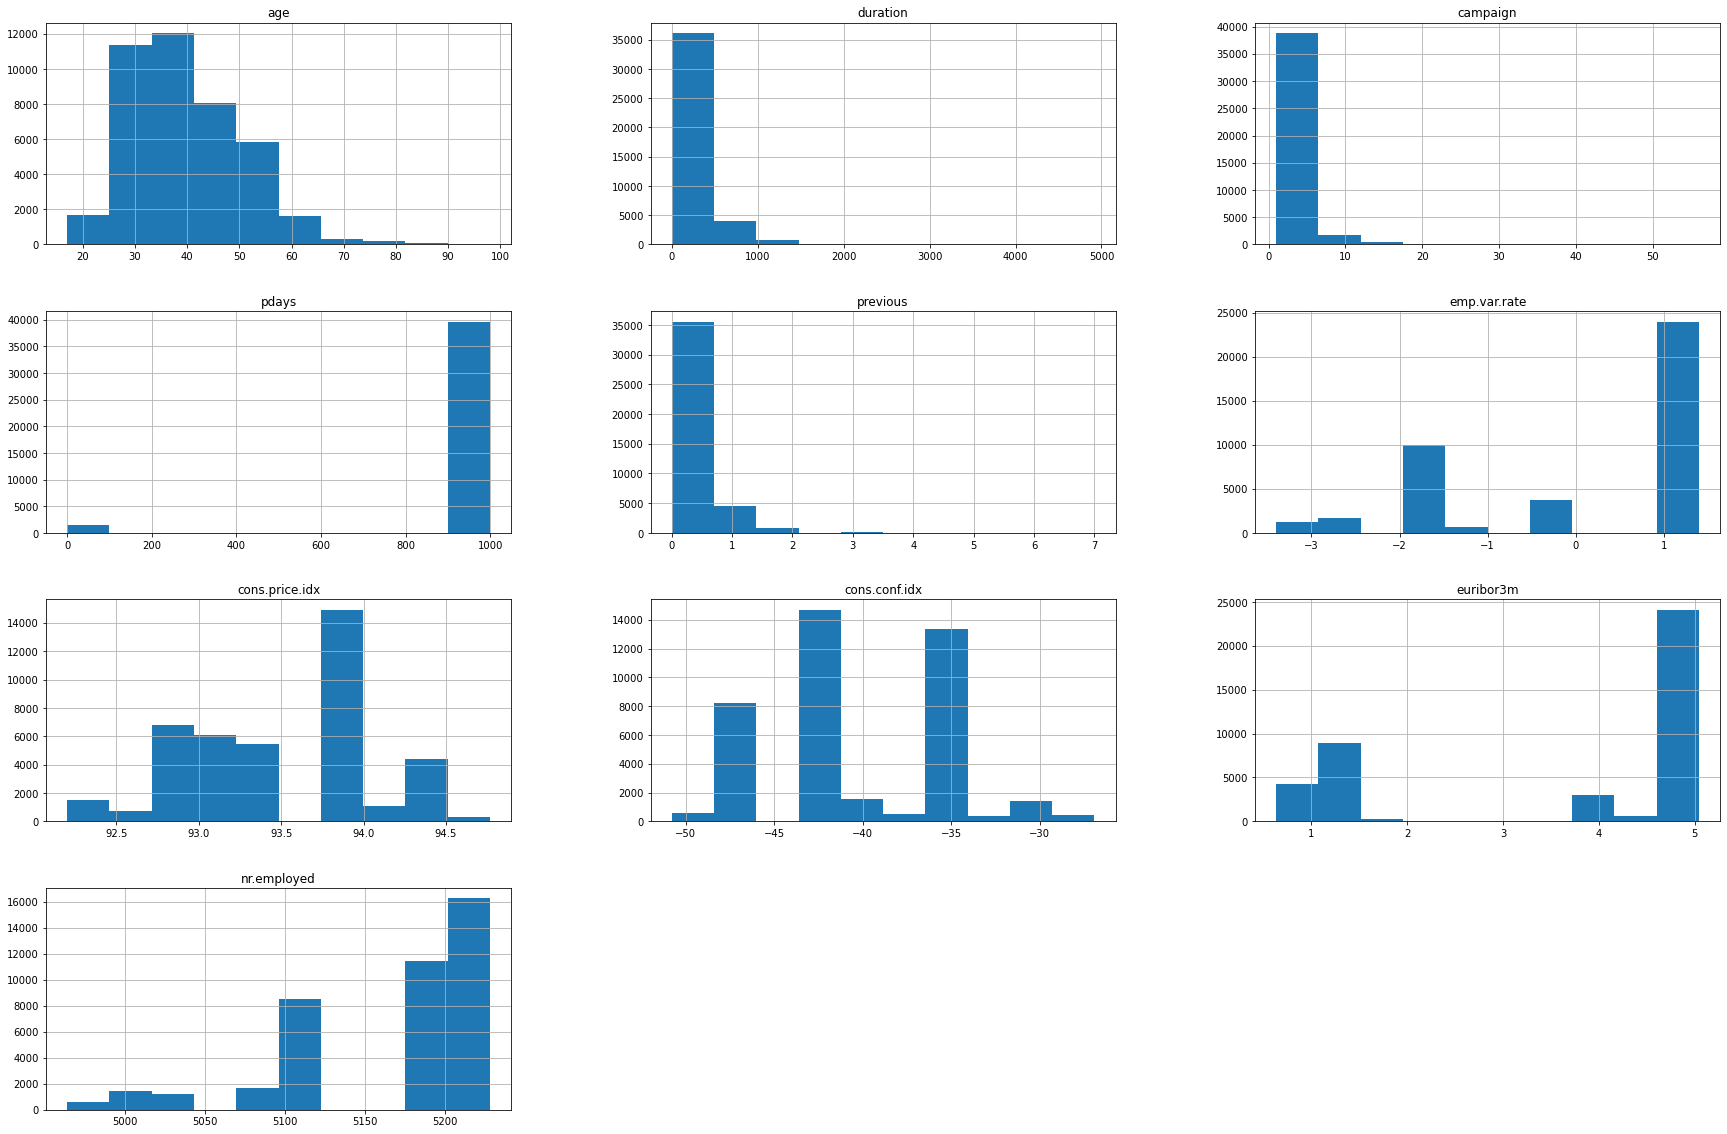

In [11]:
#histogram for numerical columns
df.hist(figsize=(30,20))

<AxesSubplot:>

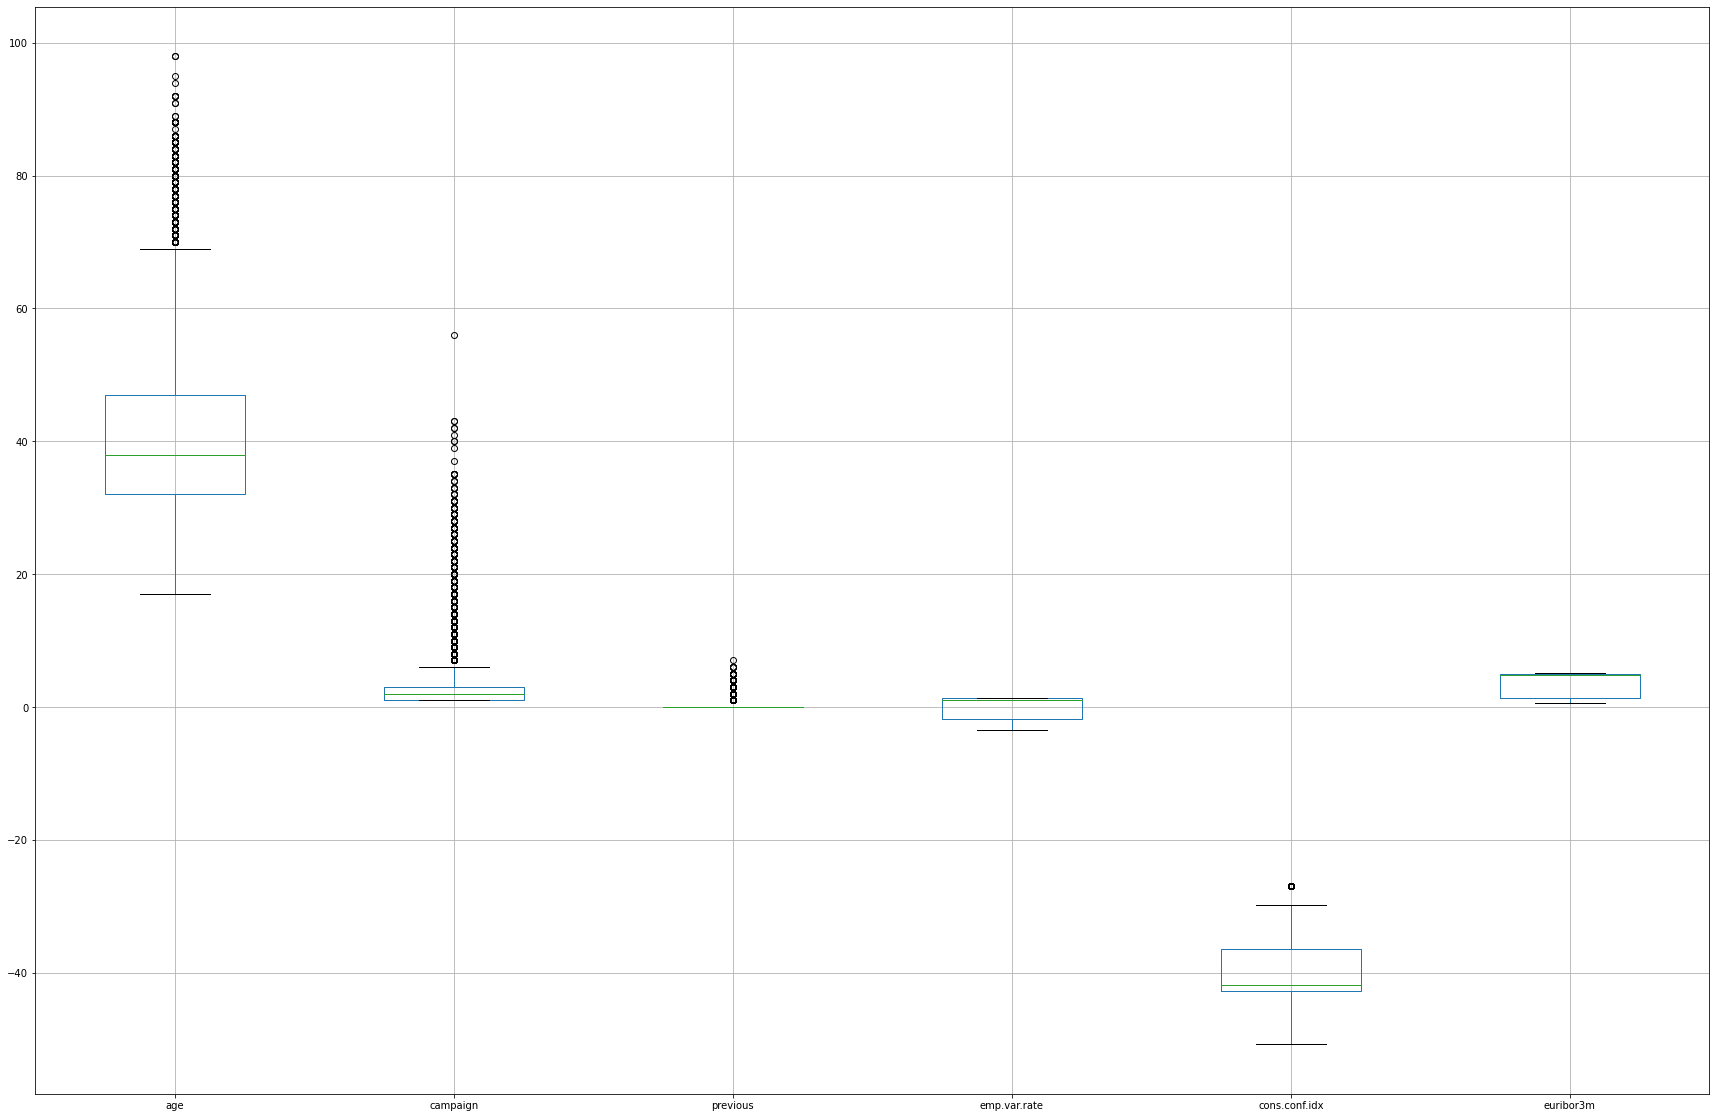

In [12]:
df[['age','campaign','previous','emp.var.rate','cons.conf.idx','euribor3m']].boxplot(figsize=(30,20))

In [13]:
#find the categorical variables
l=[]
for i in df.columns:
    if(df[i].dtypes=="object"):
        l.append(i)
print(l)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
#find unique  values in each categorical column 
for i in l:
    print(i+": ")
    print(df[i].unique())

job: 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: 
['married' 'single' 'divorced' 'unknown']
education: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: 
['no' 'unknown' 'yes']
housing: 
['no' 'yes' 'unknown']
loan: 
['no' 'yes' 'unknown']
contact: 
['telephone' 'cellular']
month: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: 
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: 
['nonexistent' 'failure' 'success']
y: 
['no' 'yes']


In [15]:
#preprocessing the categorical values
le = preprocessing.LabelEncoder()
for i in l:
    df[i]=le.fit_transform(df[i])

In [16]:
#find unique  values 
for i in l:
    print(i+": ")
    print(df[i].unique())

job: 
[ 3  7  0  1  9  5  4 10  6 11  2  8]
marital: 
[1 2 0 3]
education: 
[0 3 1 2 5 7 6 4]
default: 
[0 1 2]
housing: 
[0 2 1]
loan: 
[0 2 1]
contact: 
[1 0]
month: 
[6 4 3 1 8 7 2 5 0 9]
day_of_week: 
[1 3 4 2 0]
poutcome: 
[1 0 2]
y: 
[0 1]


In [17]:
#viewing the target variable
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [18]:
# spliting dataset into X and Y
X=df.drop('y',axis=1)

In [19]:
y=df[['y']]

In [20]:
#preprocessing the numerical values
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [21]:
#spliting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
#model building
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  

In [23]:
#fitting the dataset to the model
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [24]:
#testing model
y_pred = mlp.predict(X_test)

In [25]:
print(metrics.confusion_matrix(y_test,y_pred))  
print(metrics.classification_report(y_test,y_pred))

[[7117  220]
 [ 476  425]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7337
           1       0.66      0.47      0.55       901

    accuracy                           0.92      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [26]:
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test,y_pred))

Accuracy Score on confusion_matrix:  0.9155134741442098


In [27]:
metrics.roc_curve(y_test,y_pred)

(array([0.        , 0.02998501, 1.        ]),
 array([0.        , 0.47169811, 1.        ]),
 array([2, 1, 0]))

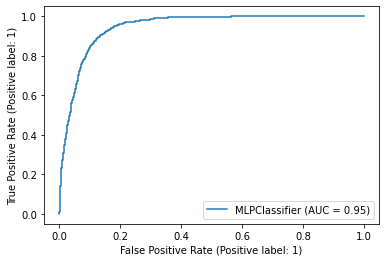

In [28]:
metrics.plot_roc_curve(mlp, X_test, y_test) 

In [35]:
score=cross_val_score( MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000), X,y.values.ravel(),cv=5)

In [36]:
score

array([0.89172129, 0.74435543, 0.8250789 , 0.25482579, 0.56294768])

In [37]:
print("Minimum scores is",min(score))
print("Average score is",np.average(score))
print("Maximum scores is",max(score))

Minimum scores is 0.25482578608716766
Average score is 0.6557858163015589
Maximum scores is 0.8917212915756252
